In [21]:
import cv2
import time
import torch
import numpy as np
import matplotlib.pyplot as plt

from dataloader import PieceDetectorDataset, PieceDetectorCOGDataset
from torchvision.datasets import CocoDetection
from torchvision import transforms
from torchvision.utils import draw_bounding_boxes
from torchvision.ops import box_convert

import glob
import os
from PIL import Image
import json

In [24]:
img_size = 320
root = 'dataloader/data/chesscog/val'
image_files = glob.glob1(root, '*.png')
json_files = glob.glob1(root, '*.json')
all_data = [json.load(open(os.path.join(root, j))) for j in json_files]

In [23]:
all_data

[{'fen': '3q2k1/5p1p/QpB1p1p1/8/P4P2/2P3PP/2P4K/3n4',
  'white_turn': True,
  'camera': {'angle': 50,
   'location': [0.02653217501938343,
    -0.25454390048980713,
    0.30335360765457153]},
  'lighting': {'mode': 'flash',
   'flash': {'active': True},
   'spot1': {'active': False,
    'xy_angle': 333,
    'focus': [-0.20270349085330963, -0.3184906840324402, 0.0],
    'location': [0.3207623362541199,
     -0.16343657672405243,
     0.19641101360321045]},
   'spot2': {'active': False,
    'xy_angle': 333,
    'focus': [-0.3737770915031433, -0.22304144501686096, 0.0],
    'location': [0.3207623362541199,
     -0.16343657672405243,
     0.2946288287639618]}},
  'corners': [[206, 633], [397, 197], [860, 227], [940, 709]],
  'pieces': [{'piece': 'k', 'square': 'g8', 'box': [740, 142, 53, 110]},
   {'piece': 'q', 'square': 'd8', 'box': [580, 133, 41, 103]},
   {'piece': 'p', 'square': 'h7', 'box': [818, 240, 33, 51]},
   {'piece': 'p', 'square': 'f7', 'box': [698, 234, 31, 50]},
   {'piece'

In [26]:
index = 0
trans = transforms.Compose([transforms.Resize((img_size, img_size)), transforms.ToTensor()])
classes = ['none', 'P', 'N', 'B', 'R', 'K', 'Q', 'p', 'n', 'b', 'r', 'k', 'q']

img = Image.open(os.path.join(root, image_files[index])).convert('RGB')
data = all_data[index]
h, w = img.size
img = trans(img)

labels = torch.tensor([classes.index(d['piece']) for d in data['pieces']], dtype=torch.int64)
boxes = torch.tensor([d['box'] for d in data['pieces']], dtype=torch.float)

boxes[:, 0::2] *= (img_size / h)
boxes[:, 1::2] *= (img_size / w)

boxes = box_convert(boxes, 'xywh', 'xyxy')

target = {'boxes': boxes, 'labels': labels}


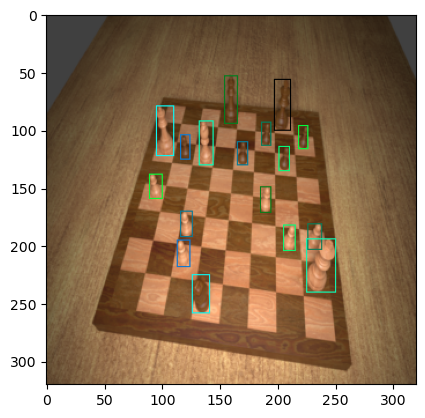

In [27]:
img = (img * 255).to(torch.uint8)
bboxes_img = draw_bounding_boxes(img, target['boxes'])
plt.imshow(bboxes_img.detach().permute(1, 2, 0))
plt.show()

In [ ]:
img, target = dataset[1]

h, w = img.size
trans = transforms.Compose([transforms.Resize(img_size), transforms.ToTensor()])
img = trans(img)
boxes = torch.tensor([t['bbox'] for t in target], dtype=torch.float)
labels = torch.tensor([t['category_id'] for t in target], dtype=torch.float)

boxes[:, 0::2] *= (img_size / h)
boxes[:, 1::2] *= (img_size / w)

boxes = box_convert(boxes, 'xywh', 'xyxy')

target = {'boxes': boxes, 'labels': labels}

In [ ]:
img = (img * 255).to(torch.uint8)
bboxes_img = draw_bounding_boxes(img, target['boxes'])
plt.imshow(bboxes_img.detach().permute(1, 2, 0))
plt.show()

In [ ]:
torch.tensor([])